In [111]:
# Dependencies
import numpy as np

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [112]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [113]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [114]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
june_temp = session.query(Measurement.date, Measurement.tobs).\
    filter(extract('month', Measurement.date) == 6)

    #groupby? (sqlalchemy.func.month(Measurement.date) == 6)?


In [115]:
#  3. Convert the June temperatures to a list.
june_temp = session.query(Measurement.date, Measurement.tobs).\
    filter(extract('month', Measurement.date) == 6).all()

#june_temp

In [116]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
import pandas as pd

june_df = pd.DataFrame(june_temp, columns=['date','June Temperature'])

june_df

,date,June Temperature
0,2010-06-01,78.0
1,2010-06-02,76.0
2,2010-06-03,78.0
3,2010-06-04,76.0
4,2010-06-05,77.0
...,...,...
1695,2017-06-26,79.0
1696,2017-06-27,74.0
1697,2017-06-28,74.0
1698,2017-06-29,76.0


In [117]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_df.describe()

,June Temperature
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


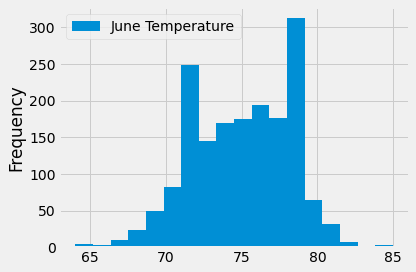

In [118]:
#Extra Data

%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

june_df.plot.hist(bins=18)
plt.tight_layout()

## D2: Determine the Summary Statistics for December

In [119]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
dec_temp = session.query(Measurement.date, Measurement.tobs).\
    filter(extract('month', Measurement.date) == 12)

In [120]:
# 7. Convert the December temperatures to a list.
dec_temp = session.query(Measurement.date, Measurement.tobs).\
    filter(extract('month', Measurement.date) == 12).all()

In [121]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 

dec_df = pd.DataFrame(dec_temp, columns= ['Date', 'Decemeber Temps'])
dec_df

,Date,Decemeber Temps
0,2010-12-01,76.0
1,2010-12-03,74.0
2,2010-12-04,74.0
3,2010-12-06,64.0
4,2010-12-07,64.0
...,...,...
1512,2016-12-27,71.0
1513,2016-12-28,71.0
1514,2016-12-29,69.0
1515,2016-12-30,65.0


In [122]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_df.describe()

,Decemeber Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [123]:
#Extra Data
dec_df.set_index(dec_df['Date'], inplace=True)

print(dec_df)

                  Date  Decemeber Temps
Date                                   
2010-12-01  2010-12-01             76.0
2010-12-03  2010-12-03             74.0
2010-12-04  2010-12-04             74.0
2010-12-06  2010-12-06             64.0
2010-12-07  2010-12-07             64.0
...                ...              ...
2016-12-27  2016-12-27             71.0
2016-12-28  2016-12-28             71.0
2016-12-29  2016-12-29             69.0
2016-12-30  2016-12-30             65.0
2016-12-31  2016-12-31             65.0

[1517 rows x 2 columns]


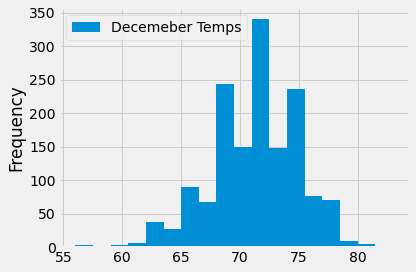

In [110]:
#Extra Data

dec_df.plot.hist(bins=18)
plt.tight_layout()